# Proyecto: Cross Validation con Regresión Logística (Clasificación de especies de flores)

## Después de entrenar un algoritmo es importante asignarle una calificación (o nivel de confinaza)
## para saber con que precisión seran sus predicciones. Para esto usaremos la técnica Validación Cruzada
## o "Cross Validation" https://scikit-learn.org/stable/modules/cross_validation.html 

## A continuación veremos el uso de las funciones `KFold` y `cross_val_score` para realizar validación cruzada  

In [1]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Importamos metrica de 'Matriz de confusión' para evaluar el aprendizaje:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Cargamos datos:
iris = datasets.load_iris()
 
# Separamos Datos para entrenamiento y Pruebas:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

In [3]:
# Detectamos el numero de Clases:
np.unique(y_train)

array([0, 1, 2])

In [4]:
Clases = ['clase 1','clase 2', 'clase 3']
n_clases =len(Clases)

In [5]:
# Definimos el clasificador:
clf = LogisticRegression()

In [ ]:
# Entrenamos con datos de entrenamiento:
clf.fit(X_train, y_train)

In [7]:
# Evaluamnos el aprendizaje con los datos de entrenamiento:

score_train = clf.score(X_train,y_train)
 
print('Accuracy con datos de entrenamiento', score_train)

Accuracy con datos de entrenamiento 0.9666666666666667


In [8]:
# Evaluamos el aprendizaje con los datos de pruebas:

y_test_predict = clf.predict(X_test)
 
score_test = metrics.accuracy_score(y_test, y_test_predict)
 
print('Accuracy con datos de prueba', score_test)

Accuracy con datos de prueba 1.0


In [9]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [10]:
y_test_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

La diferencia entre el accuracy con los datos de entrenamiento y pruebas es mínimo, por lo tanto no hay Overfitting!

## Realizamos una prueba de Cross Validation para validar el aprendizaje del modelo:

In [11]:
# Definimos el clasificador K-Fold:
kf = KFold(n_splits=5)

In [ ]:
# Aplicamos el clasificador a los datos de entrenamiento:
scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')

In [13]:
print("Accuracy en cada iteración de Cross-Validation:", scores)
 
print("Accuracy final con Cross-Validation:", scores.mean())

Accuracy en cada iteración de Cross-Validation: [0.95833333 0.95833333 1.         1.         0.875     ]
Accuracy final con Cross-Validation: 0.9583333333333334


In [14]:
# Generamos matriz de confusión usando los nombres de las etiquetas de prueba y predichas:
MC_RF = confusion_matrix(y_test, y_test_predict)
print('Matriz de confusión: \n',MC_RF)

Matriz de confusión: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


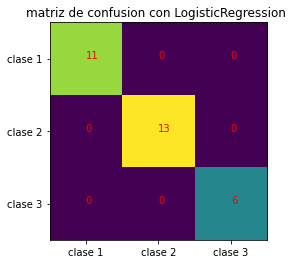

In [16]:
# Graficamos matriz de confusión:

plt.figure()
plt.imshow(MC_RF)
plt.title('matriz de confusion con LogisticRegression ')

plt.xticks( range( n_clases ), Clases )
plt.yticks( range( n_clases ), Clases )

for i in range( n_clases ):
    for j in range( n_clases):
        plt.text(j,i, MC_RF[i,j] , color='red')

plt.show()